In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from rcpl.config import BASE_DIR
from rcpl.rcpl import Experiment

In [3]:
df_exp = pd.read_csv(BASE_DIR / 'data' / 'AluminumStabilizationDiskr.csv')
df_exp['epsp'] = df_exp['eps'] - df_exp['sig']/68000

In [4]:
epsp = df_exp['epsp'].to_numpy()[:601]

In [5]:
gen_epsp = Experiment.random_experiment([0.003, 0.005, 43], 15).epsp

In [6]:
(gen_epsp[14]-gen_epsp[13]) / (gen_epsp[1]-gen_epsp[0])

20.000000000000018

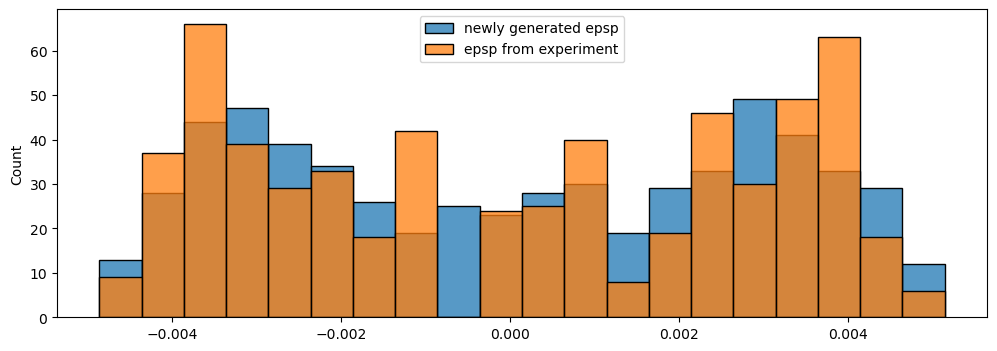

In [7]:
data_min = min(np.min(gen_epsp[:len(epsp)]), np.min(epsp))
data_max = max(np.max(gen_epsp[:len(epsp)]), np.max(epsp))
bins = np.linspace(data_min, data_max, 21)  # e.g., 50 bins

plt.figure(figsize=(12,4))
sns.histplot(gen_epsp[:len(epsp)], bins=bins, label='newly generated epsp')
sns.histplot(epsp, bins=bins, label='epsp from experiment')

plt.legend()
plt.show()

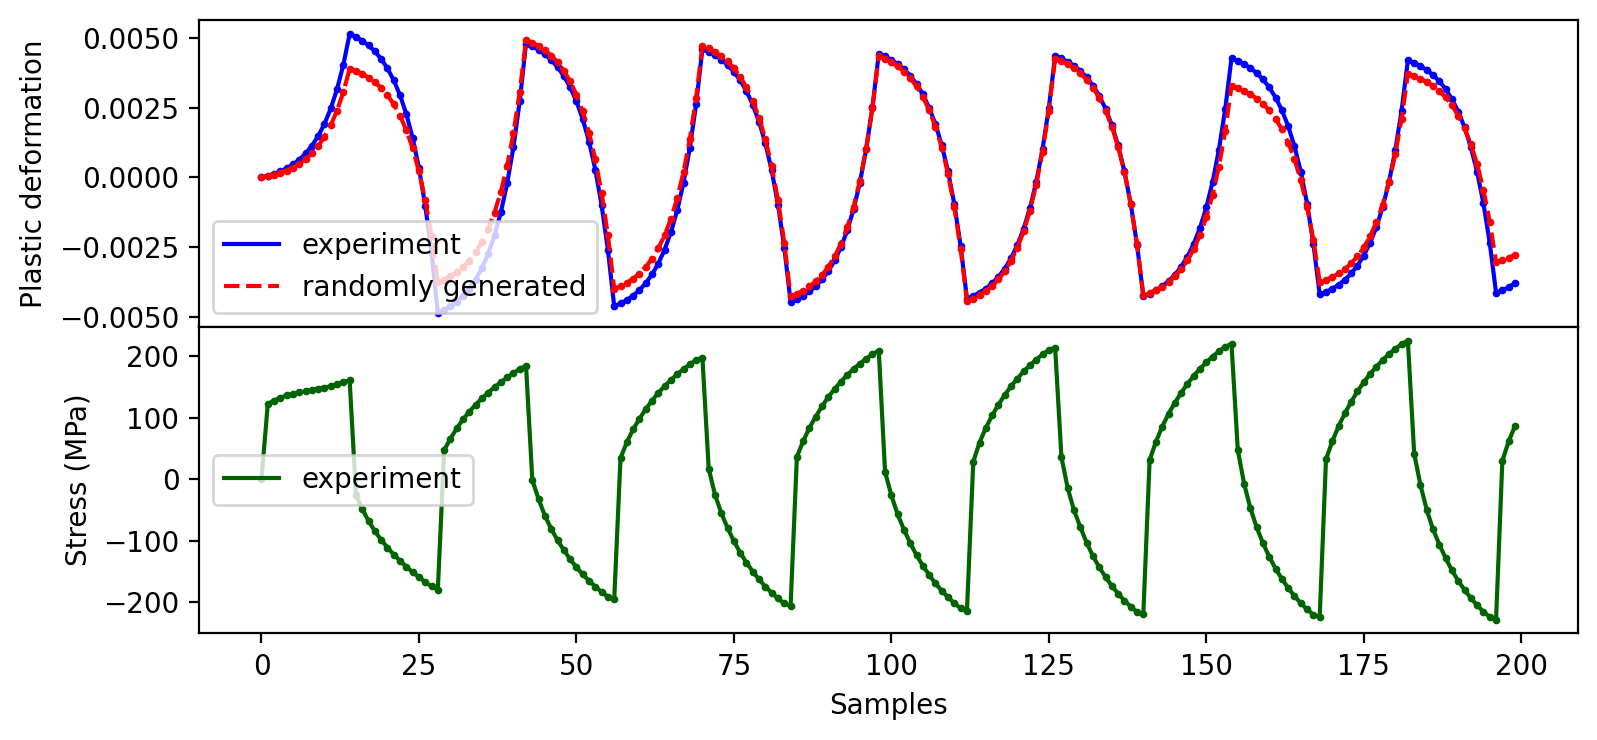

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(8, 3.8), dpi=200, sharex=True)
markersize = 3.5
# First plot
axs[0].plot(epsp[:200], '.', color="blue", markersize=markersize)
axs[0].plot(epsp[:200], color="blue", label="experiment")
axs[0].plot(gen_epsp[:200], color='red',label="randomly generated", ls="--")
axs[0].plot(gen_epsp[:200], '.',  color='red', markersize=markersize)
axs[0].legend()
axs[0].set_ylabel('Plastic deformation')

# Second plot
axs[1].plot(df_exp[:200]['sig'], color='darkgreen', label="experiment")
axs[1].plot(df_exp[:200]['sig'], '.', color='darkgreen', markersize=markersize)
axs[1].legend()
axs[1].set_xlabel('Samples')
axs[1].set_ylabel('Stress (MPa)')

# Adjust layout and save
plt.tight_layout()
plt.subplots_adjust(hspace=0.0)
# fig.savefig('epsp_comparison_combined.pdf', bbox_inches='tight', pad_inches=0)
plt.show()